# Traffic Data Analysis 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### data source:
https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset

In [9]:
dataset = pd.read_csv('traffic.csv',na_values='###',parse_dates=True, index_col='DateTime' )

In [10]:
dataset.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [11]:
dataset.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


### Splitting DateTime into Year, Month, Day, Hour

In [12]:
dataset['Year'] = pd.Series(dataset.index).apply(lambda x: x.year).to_list()
dataset['Month'] = pd.Series(dataset.index).apply(lambda x: x.month).to_list()
dataset['Day'] = pd.Series(dataset.index).apply(lambda x: x.day).to_list()
dataset['Hour'] = pd.Series(dataset.index).apply(lambda x: x.hour).to_list()

In [14]:
dataset.tail()

,Junction,Vehicles,ID,Year,Month,Day,Hour
DateTime,,,,,,,
2017-06-30 19:00:00,4,11,20170630194,2017,6,30,19
2017-06-30 20:00:00,4,30,20170630204,2017,6,30,20
2017-06-30 21:00:00,4,16,20170630214,2017,6,30,21
2017-06-30 22:00:00,4,22,20170630224,2017,6,30,22
2017-06-30 23:00:00,4,12,20170630234,2017,6,30,23


#### Since the ID column does'nt  give us any insights, we can drop it

In [16]:
dataset.drop('ID',axis = 1, inplace=True)
dataset.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0
2015-11-01 01:00:00,1,13,2015,11,1,1
2015-11-01 02:00:00,1,10,2015,11,1,2
2015-11-01 03:00:00,1,7,2015,11,1,3
2015-11-01 04:00:00,1,9,2015,11,1,4


## Data Exploration

In [17]:
 data = dataset.copy()

In [48]:
data.Junction.value_counts()

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

In [65]:
def junction_hist(junction = 1):
    x = data[data['Junction'] == junction]
    fig, ax = plt.subplots(figsize=(17,6))
    ax = sns.histplot(x['Vehicles'],stat = 'probability',kde=True)
    plt.ylim([0,0.14])
    plt.xlim([0,175])
    ax.set_title(f'Traffic distribution for Junction{junction}')
    ax.grid(True, ls='-', alpha=0.75)
    plt.show()

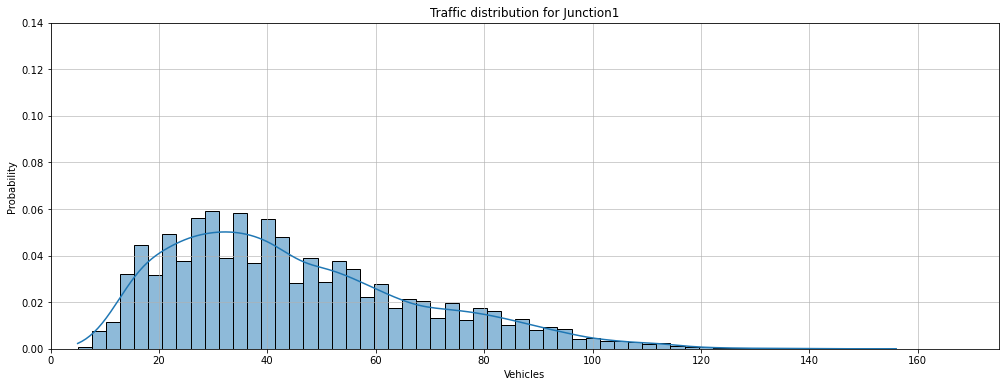

In [66]:
junction_hist(1)

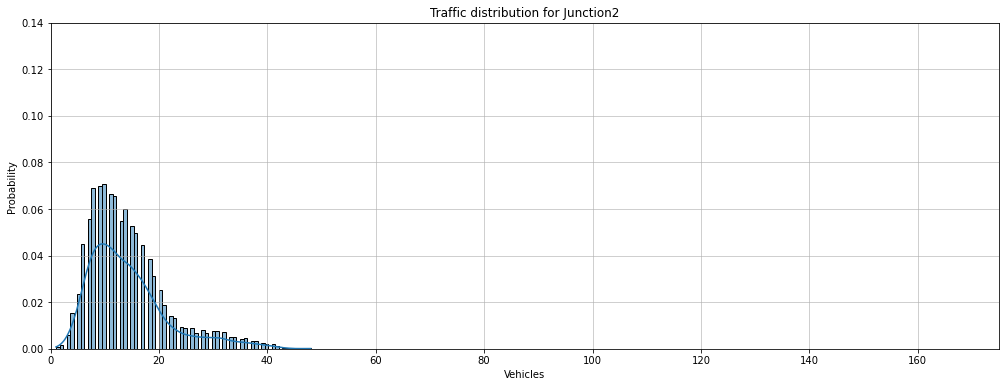

In [67]:
junction_hist(2)

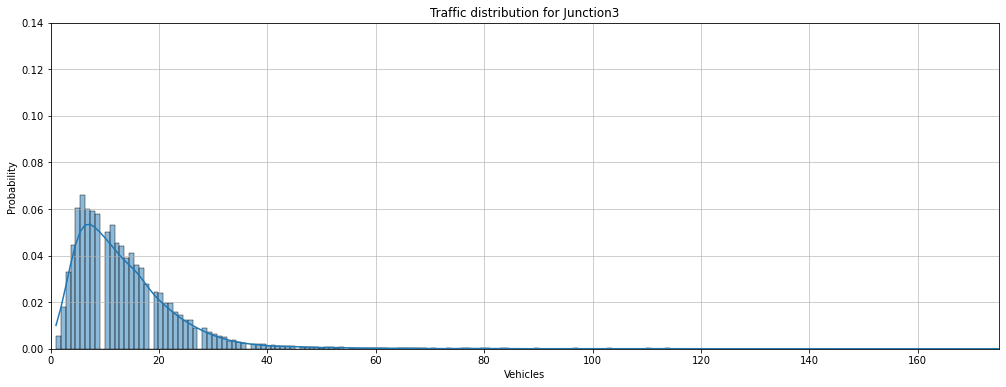

In [68]:
junction_hist(3)

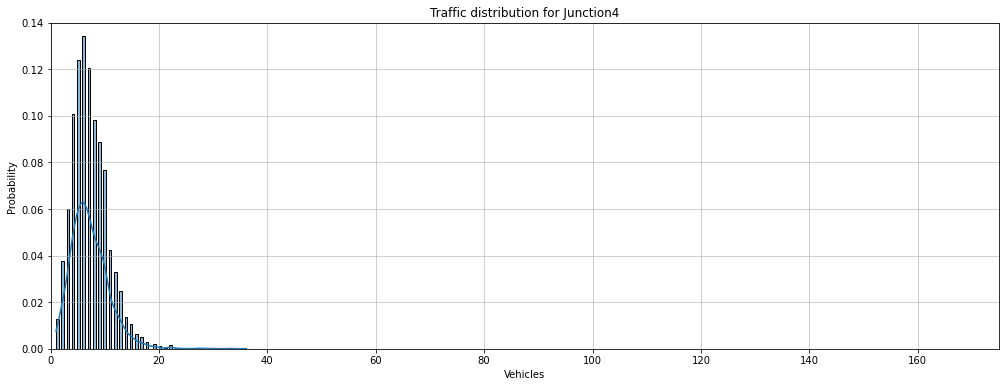

In [69]:
junction_hist(4)

In [70]:
data.tail(1).Year[0]

2017

In [75]:
def traffic_time_series(junction=1):
    fig, ax = plt.subplots(figsize=(17, 5))
    df = data[data.Junction == junction]
    ax = sns.lineplot(data=df, y='Vehicles', x='DateTime', ax=ax)
    start = df.head(1)
    end = df.tail(1)
    ax.set_title(f'Count of Vehicles in junction {junction} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()

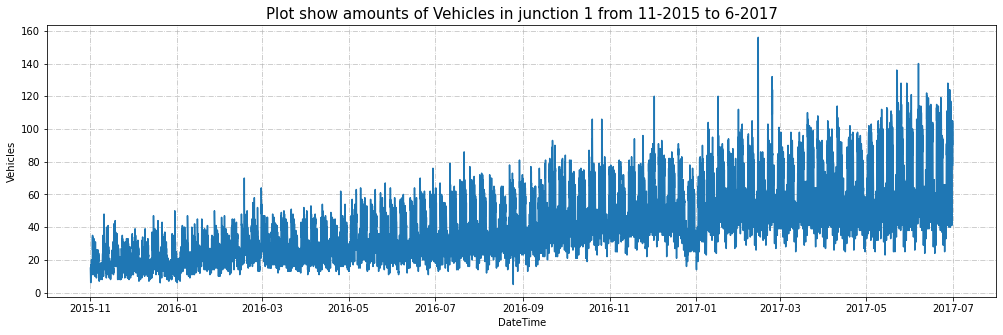

In [76]:
traffic_time_series(1)

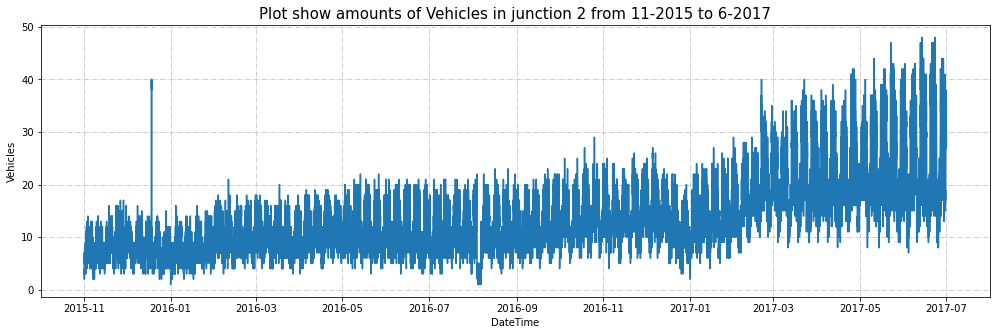

In [77]:
traffic_time_series(2)

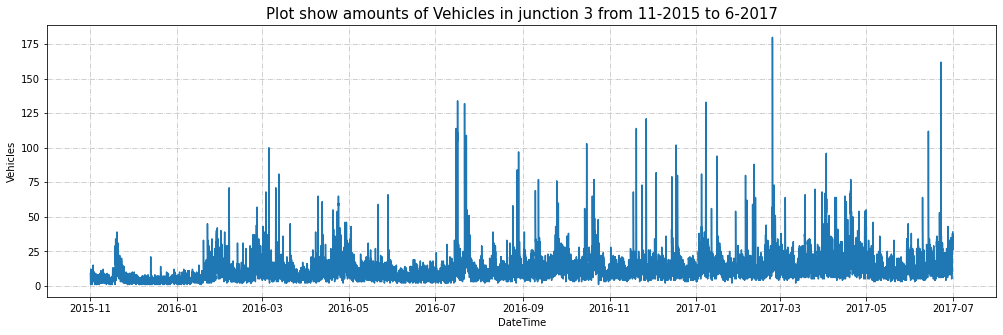

In [78]:
traffic_time_series(3)

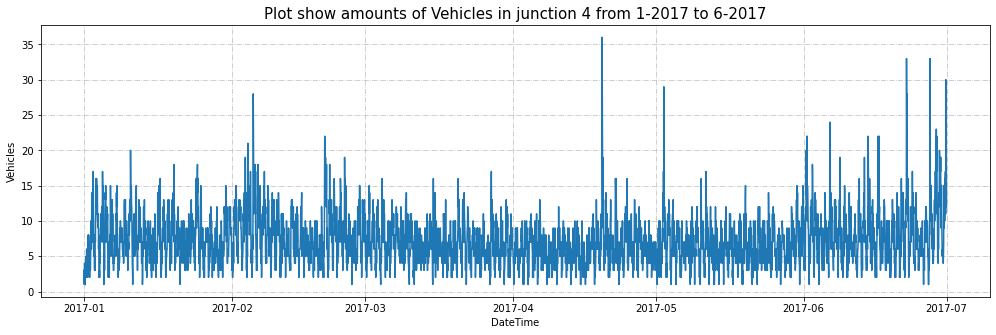

In [79]:
traffic_time_series(4)

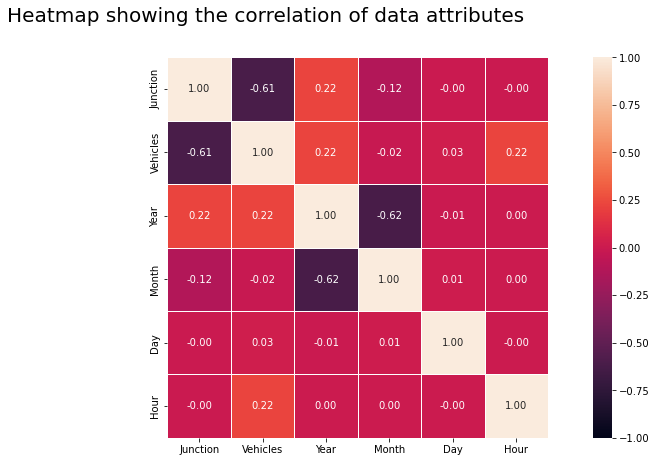

In [80]:
f, ax = plt.subplots(figsize=(16, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1)
f.suptitle('Heatmap showing the correlation of data attributes', fontsize=20)
plt.show()